# Statistical Analysis

## Mathametical Operations

In [1]:
import pandas as pd
import numpy as np

**Data of Different Shape**

In [8]:
#Array of Different Shape
a = pd.DataFrame(np.arange(12).reshape(3, 4))
print('a:\n', a)
b = pd.DataFrame(np.arange(20).reshape(4, 5))
print('b:\n', b)


a:
    0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
b:
     0   1   2   3   4
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19


In [11]:
#Array +, -, *, / 
#Common index --> Do the math
#Other index --> Align as NaN --> f(NaN) = NaN
a + b

,0,1,2,3,4
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [13]:
#Alternatively, use .add(), .sub(), .mul(), .div()
#can specify parameter
a.add(b, fill_value = 100)#Align index and fill, then add


,0,1,2,3,4
0,0.0,2.0,4.0,6.0,104.0
1,9.0,11.0,13.0,15.0,109.0
2,18.0,20.0,22.0,24.0,114.0
3,115.0,116.0,117.0,118.0,119.0


In [14]:
a.mul(b, fill_value = 0)

,0,1,2,3,4
0,0.0,1.0,4.0,9.0,0.0
1,20.0,30.0,42.0,56.0,0.0
2,80.0,99.0,120.0,143.0,0.0
3,0.0,0.0,0.0,0.0,0.0


**Data of Different Dimension**

*Specify Axis*

In [317]:
# DataFrame and Series
b = pd.DataFrame(np.arange(20).reshape(4, 5))# 2D
c = pd.Series(np.arange(4)) # 1D
print('b:\n', b)
print('c:\n', c)

b:
     0   1   2   3   4
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19
c:
 0    0
1    1
2    2
3    3
dtype: int64


In [319]:
# 1D and 2D
b - c 
#Default calculate on axis 1 (horizontal direction)

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,NaN
1,5.0,5.0,5.0,5.0,NaN
2,10.0,10.0,10.0,10.0,NaN
3,15.0,15.0,15.0,15.0,NaN


In [321]:
#specify axis to match
b.sub(c, axis = '0') #axis = 'index'


,0,1,2,3,4
0,0,1,2,3,4
1,4,5,6,7,8
2,8,9,10,11,12
3,12,13,14,15,16


In [324]:
b.sub(c, axis = '1') #axis = 'columns'

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,NaN
1,5.0,5.0,5.0,5.0,NaN
2,10.0,10.0,10.0,10.0,NaN
3,15.0,15.0,15.0,15.0,NaN


## Logical Operations

*Can only compare identically-labeled DataFrame objects*

In [69]:
#Dimension and Shape has to MATCH, otherwise ERROR!
a = pd.DataFrame(np.arange(12).reshape(3, 4))
d = pd.DataFrame(np.arange(12, 0, -1).reshape(3, 4))
print('a:\n', a)
print('d:\n', d)

a:
    0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
d:
     0   1   2  3
0  12  11  10  9
1   8   7   6  5
2   4   3   2  1


In [70]:
#Compare each element
a > d

,0,1,2,3
0,False,False,False,False
1,False,False,False,True
2,True,True,True,True


In [62]:
a = pd.DataFrame(np.arange(12).reshape(3, 4))#2D
e = pd.DataFrame(np.arange(3)) #1D but same index (axis0) length

In [71]:
# Shape Match is Required for comparison
try:
    a > e 
except: 
    print('ValueError: Can only compare identically-labeled DataFrame objects')

ValueError: Can only compare identically-labeled DataFrame objects


## Data Sorting

**Sort Index**

In [76]:
b = pd.DataFrame(np.arange(20).reshape(4, 5), \
                 index = ['c', 'a', 'd', 'b'] )
b

,0,1,2,3,4
c,0,1,2,3,4
a,5,6,7,8,9
d,10,11,12,13,14
b,15,16,17,18,19


In [77]:
#Sort by index value
#default: by index, ascending, returns a new df
b.sort_index(axis = 0, inplace = False) #Default settings

,0,1,2,3,4
a,5,6,7,8,9
b,15,16,17,18,19
c,0,1,2,3,4
d,10,11,12,13,14


In [78]:
#Sort axis 1 (columns)
b.sort_index(axis = 1, ascending = False) #columns largest first 

,4,3,2,1,0
c,4,3,2,1,0
a,9,8,7,6,5
d,14,13,12,11,10
b,19,18,17,16,15


**Sort Values**

In [325]:
# sort index order, based on which element
b.sort_values(by =2, axis = 0, ascending = False) #sort rows, based on [2] element (3rd element of each row)

,0,1,2,3,4
3,15,16,17,18,19
2,10,11,12,13,14
1,5,6,7,8,9
0,0,1,2,3,4


In [ ]:
# sort columns order, based on which element
b.sort_values('a', axis = 1, ascending = False) #sort columns, based on ['a'] element 

*NaN value is sorted to the last, regardless of ascending*

## Scales

Ratio : absolute, e.g. weight, hight<br>Interval: ralative, no true 0, e.g. temp, direction<br>Oridinal: in-order, not numerical. e.g. ranks<br>Nominal/Categorical: Symbolic only e.g. True, False

In [46]:
#Convert between datatype/scales
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'],
                  columns = ['Grades']) #save the following code

#df.rename(columns={0: 'Grades'}, inplace=True)
df.head()

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B


In [47]:
#Convert data to category
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [51]:
#Extract the data, convert to category 
#and specify [low-->high], becomes nominal
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True) #Nomical
grades.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [52]:
#Comparison and masking now enabled
#>,<,=, min, max...
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

In [56]:
#Example
s = pd.Series(['Low', 'Low', 'High', 'Medium', 'Low', 'High', 'Low'])

s.astype('category', 
         categories=['Low', 'Medium', 'High'], 
         ordered=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


0       Low
1       Low
2      High
3    Medium
4       Low
5      High
6       Low
dtype: category
Categories (3, object): [Low < Medium < High]

In [69]:
#Reduce Ratio/interval to Category data
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = (df.set_index('STNAME')
 .groupby(level=0)['CENSUS2010POP']
 .agg({'avg': np.average}))
                                                                    #agg({'avg': np.average})
df.head()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,avg
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207


In [71]:
#cut(x, bins) 
#reduce data into one of 10 intervals
pd.cut(df['avg'],10)

,avg
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207


In [72]:
#more Example on pd.cut():

s = pd.Series([168, 180, 174, 190, 170, 185, 179, 181, 175, 169, 182, 177, 180, 171])

# cut and label in order [low --> high].
pd.cut(s, 3, labels=['Small', 'Medium', 'Large'])

0      Small
1     Medium
2      Small
3      Large
4      Small
5      Large
6     Medium
7     Medium
8      Small
9      Small
10    Medium
11    Medium
12    Medium
13     Small
dtype: category
Categories (3, object): [Small < Medium < Large]

*Most Default axis = 0*

In [84]:
b = pd.DataFrame(np.arange(20).reshape(4, 5), \
                 index = ['c', 'a', 'd', 'b'] )
b      

,0,1,2,3,4
c,0,1,2,3,4
a,5,6,7,8,9
d,10,11,12,13,14
b,15,16,17,18,19


In [91]:
b.sum() #default axis 0 

0    30
1    34
2    38
3    42
4    46
dtype: int64

In [92]:
b.count() #count none-NaN elements 

0    4
1    4
2    4
3    4
4    4
dtype: int64

In [93]:
b.mean()
b.median()

0     7.5
1     8.5
2     9.5
3    10.5
4    11.5
dtype: float64

In [94]:
b.var()
b.std()

<bound method DataFrame.std of     0   1   2   3   4
c   0   1   2   3   4
a   5   6   7   8   9
d  10  11  12  13  14
b  15  16  17  18  19>

In [103]:
b.min()
b.max()

0    15
1    16
2    17
3    18
4    19
dtype: int64

**For Series / 1D-DataFrame Only:**

In [155]:
c = pd.Series(np.arange(4), \
                 index = ['a', 'b', 'c', 'd'])
c

a    0
b    1
c    2
d    3
dtype: int64

In [162]:
#return the min/max index number
c.values.argmin()
c.values.argmax()

3

In [160]:
#return the min/max User-defined index 
c.idxmin()
c.idxmax(axis = 1)

'd'

.`describe`( ) for descriptive summary

In [163]:
#Descirption of a Series 
c.describe()


(count    4.000000
 mean     1.500000
 std      1.290994
 min      0.000000
 25%      0.750000
 50%      1.500000
 75%      2.250000
 max      3.000000
 dtype: float64, pandas.core.series.Series)

In [ ]:
#The descption is a Series type
#Can use Sereies methods
type(c.describe())  

In [168]:
#use [] to return the value of a singel statistics
c.describe()['count'], \
c.describe()['25%'], \
c.describe()[0]



(4.0, 0.75, 4.0)

In [173]:
# Describe() of a DataFrame
# Axis = 0 
b.describe() 

,0,1,2,3,4
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,7.500000,8.500000,9.500000,10.500000,11.500000
std,6.454972,6.454972,6.454972,6.454972,6.454972
min,0.000000,1.000000,2.000000,3.000000,4.000000
25%,3.750000,4.750000,5.750000,6.750000,7.750000
50%,7.500000,8.500000,9.500000,10.500000,11.500000
75%,11.250000,12.250000,13.250000,14.250000,15.250000
max,15.000000,16.000000,17.000000,18.000000,19.000000


In [170]:
#DataFrame's describe() is a DataFrame
type(b.describe())

pandas.core.frame.DataFrame

In [182]:
# Use .loc[''] or .iloc[ ] for a single statistics
b.describe().loc['count']
b.describe().iloc[0]

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: count, dtype: float64

In [183]:
# Use [ ] for a singel column
b.describe()[2] #returns decription for 3rd colunm

count     4.000000
mean      9.500000
std       6.454972
min       2.000000
25%       5.750000
50%       9.500000
75%      13.250000
max      17.000000
Name: 2, dtype: float64

## Cummulative Statistics

In [2]:
import pandas as pd
import numpy as np

In [4]:
b = pd.DataFrame(np.arange(20).reshape(4, 5), \
                index = ['c', 'a', 'b', 'd'])
b


,0,1,2,3,4
c,0,1,2,3,4
a,5,6,7,8,9
b,10,11,12,13,14
d,15,16,17,18,19


In [7]:
#cummulative sum, produt
b.cumsum() 
b.cumprod()

,0,1,2,3,4
c,0,1,2,3,4
a,5,7,9,11,13
b,15,18,21,24,27
d,30,34,38,42,46


In [11]:
#cummulative min, max
b.cummin()
b.cummax()

,0,1,2,3,4
c,0,1,2,3,4
a,5,6,7,8,9
b,10,11,12,13,14
d,15,16,17,18,19


**Rolling (n-Window) Calculation**

.`rolling`( w ). stats( )

In [12]:
b = pd.DataFrame(np.arange(20).reshape(4, 5), \
                index = ['c', 'a', 'b', 'd'])
b

,0,1,2,3,4
c,0,1,2,3,4
a,5,6,7,8,9
b,10,11,12,13,14
d,15,16,17,18,19


In [15]:
#cummulative sum of n, (n-1)
b.rolling(2).sum()

,0,1,2,3,4
c,NaN,NaN,NaN,NaN,NaN
a,5.0,7.0,9.0,11.0,13.0
b,15.0,17.0,19.0,21.0,23.0
d,25.0,27.0,29.0,31.0,33.0


In [ ]:
# n-moving average
b.rolling(n).mean()

In [ ]:
# n-moving std, var
b.rolling(n).std()
b.rolling(n).var()


## Correlation Analysis

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

**For Series / 1D Data**

In [18]:
#Housing Price and M2 correlation?
hprice = pd.Series([3.04, 22.93, 12.75, 22.6, 12.33], \
                   index = ['2008', '2009', '2010', '2011', '2012'])
m2 = pd.Series([8.18, 18.38, 9.13, 7.82, 6.69], \
               index = ['2008', '2009', '2010', '2011', '2012']) 
hprice, m2

(2008     3.04
 2009    22.93
 2010    12.75
 2011    22.60
 2012    12.33
 dtype: float64, 2008     8.18
 2009    18.38
 2010     9.13
 2011     7.82
 2012     6.69
 dtype: float64)

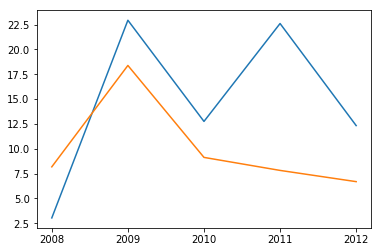

In [24]:
#Calculate Pearson Correlation coefficient
hprice.corr(m2)


In [ ]:
plt.plot(hprice.index, hprice, m2.index, m2)

In [25]:
#Calulate Coverance matrix
hprice.cov(m2)

20.625449999999997

# Distributions in Pandas

In [1]:
import pandas as pd
import numpy as np

In [22]:
#generate sum of binomial result  
np.random.binomial(1, 0.5) #one time, 50% sucess

0

In [20]:
#calculate probabily of sucess for a single draw
np.random.binomial(1000, 0.5)/1000

0.509

In [39]:
#Potential results of multiple simulations
x = np.random.binomial(20, 0.5, 1000) #20 tials each simulation x 1000 simul

np.count_nonzero(x>=15) / 1000 #use np.count_nonzero to count True

unique, counts = np.unique(x>=15, return_counts=True)
dict(zip(unique,counts)) #use dict(zip(u,c)) to receive results

(x>=15).mean() #short cuts :(0+0+1+0..)/n

{False: 977, True: 23}

In [40]:
chance_of_tornado = 0.01/100 #quite low in a day
np.random.binomial(100000, chance_of_tornado) #how many torado in 10,000 days?

13

In [43]:
#Porbability of an event happens in sequence

chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)#observe 100k days
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

107 tornadoes back to back in 2739.72602739726 years


In [ ]:
np.random.uniform(0, 1)

In [ ]:
np.random.normal(0.75)

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [45]:
#generate normal distribution sample
distribution = np.random.normal(0.75,size=1000) #mean, std, size

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))#hard way

0.9851368604107645

In [46]:
np.std(distribution)

0.9851368604107645

In [47]:
import scipy.stats as stats #scipy.stats


In [ ]:
#measure kurtosis of sample
stats.kurtosis(distribution)

In [ ]:
#measure skewness of sample
stats.skew(distribution)

In [48]:
#chi square is defined solely by degreen of freedom
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

1.9307648421351384

In [49]:
#higher df, lower skewness
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2273409577911252

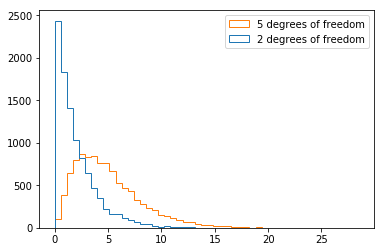

In [50]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

In [51]:
df = pd.read_csv('grades.csv')

In [52]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [53]:
len(df)

2315

In [54]:
#categorize into 2 dataframes
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [55]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [56]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [57]:
from scipy import stats
stats.ttest_ind?

In [58]:
#t-test - indepent
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [59]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [60]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.08710151634155668)